In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgames3.csv');

# 최고 매출량

In [ ]:
df.loc[ df.NA_Sales.idxmax() ] # 북미 최고 매출 게임 - Grand Theft Auto V(2013, 액션, X360)
df.loc[ df.EU_Sales.idxmax() ] # 유럽 최고 매출 게임 - FIFA 14(2013, 스포츠, X360)
df.loc[ df.JP_Sales.idxmax() ] # 일본 최고 매출 게임 - Pokemon FireRed(2004, 롤플레잉, GBA)
df.loc[ df.Other_Sales.idxmax() ] # 기타 최고 매출 게임 - Fallout3(2008, 롤플레잉, PS3)

# 플랫폼 그래프
> 생산량 , 출고량 , 나라별

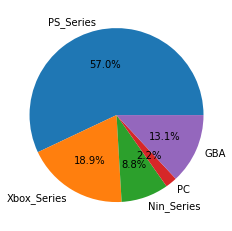

In [4]:
PS_Series = df[df.Platform == 'PS'].Total_Sales.sum() + df[df.Platform == 'PS2'].Total_Sales.sum() + df[df.Platform == 'PS3'].Total_Sales.sum() + df[df.Platform == 'PSP'].Total_Sales.sum() + df[df.Platform == 'PS4'].Total_Sales.sum() + df[df.Platform == 'PSV'].Total_Sales.sum()
Xbox_Series = df[df.Platform == 'XB'].Total_Sales.sum() + df[df.Platform == 'X360'].Total_Sales.sum() + df[df.Platform == 'XOne'].Total_Sales.sum()
Nin_Series = df[df.Platform == 'DS'].Total_Sales.sum() + df[df.Platform == '3DS'].Total_Sales.sum()

platform = [PS_Series , Xbox_Series , Nin_Series , df[df.Platform == 'PC'].Total_Sales.sum() , df[df.Platform == 'GBA'].Total_Sales.sum() ]
labels = ['PS_Series' , 'Xbox_Series' , 'Nin_Series' , 'PC' , 'GBA']

plt.pie(platform, labels=labels , autopct='%.1f%%' );

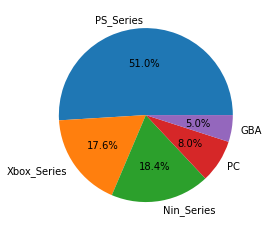

In [5]:
PS_Series = len(df[df.Platform == 'PS']) + len(df[df.Platform == 'PS2']) + len(df[df.Platform == 'PS3']) + len(df[df.Platform == 'PSP']) + len(df[df.Platform == 'PS4']) + len(df[df.Platform == 'PSV'])
Xbox_Series = len(df[df.Platform == 'XB']) + len(df[df.Platform == 'X360']) + len(df[df.Platform == 'XOne'])
Nin_Series = len(df[df.Platform == 'DS']) + len(df[df.Platform == '3DS'])

platform_num = [PS_Series , Xbox_Series , Nin_Series , len(df[df.Platform == 'PC']) , len(df[df.Platform == 'GBA']) ]
labels = ['PS_Series' , 'Xbox_Series' , 'Nin_Series' , 'PC' , 'GBA']

plt.pie(platform_num, labels=labels , autopct='%.1f%%' );

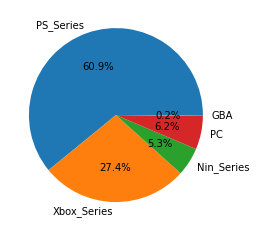

In [6]:
PS_Series = df[df.Platform == 'PS'].Other_Sales.sum() + df[df.Platform == 'PS2'].Other_Sales.sum() + df[df.Platform == 'PS3'].Other_Sales.sum() + df[df.Platform == 'PSP'].Other_Sales.sum() + df[df.Platform == 'PS4'].Other_Sales.sum() + df[df.Platform == 'PSV'].Other_Sales.sum()
Xbox_Series = df[df.Platform == 'XB'].Other_Sales.sum() + df[df.Platform == 'X360'].Other_Sales.sum() + df[df.Platform == 'XOne'].Other_Sales.sum()
Nin_Series = df[df.Platform == 'DS'].Other_Sales.sum() + df[df.Platform == '3DS'].Other_Sales.sum()

platform = [PS_Series , Xbox_Series , Nin_Series , df[df.Platform == 'PC'].Other_Sales.sum() , df[df.Platform == 'GBA'].Other_Sales.sum() ]
labels = ['PS_Series' , 'Xbox_Series' , 'Nin_Series' , 'PC' , 'GBA']

plt.pie(platform, labels=labels , autopct='%.1f%%' );

# 장르 그래프
> 생산량 , 출고량 , 플랫폼과 장르

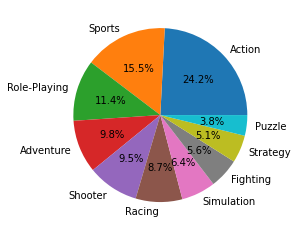

In [7]:
plt.pie(df.Genre.value_counts() , labels = df.Genre.value_counts().index , autopct='%.1f%%' );

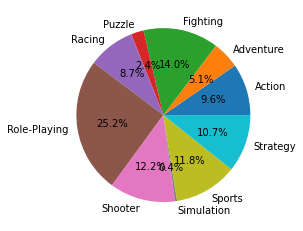

In [8]:
a = df.groupby('Genre').mean()['Total_Sales']; b = df.groupby('Genre').mean()['NA_Sales']; c = df.groupby('Genre').mean()['EU_Sales']
d = df.groupby('Genre').mean()['JP_Sales']; e = df.groupby('Genre').mean()['Other_Sales']
plt.pie(e , labels=e.index , autopct='%.1f%%' );

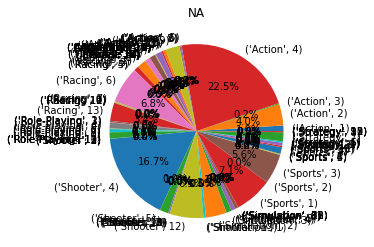

In [9]:
ap = df.groupby('Genre').sum()['Platform_num']

bp = df.groupby( ['Genre' , 'Platform_num'] ).sum()['NA_Sales']
cp = df.groupby( ['Genre' , 'Platform_num'] ).sum()['EU_Sales']
dp = df.groupby( ['Genre' , 'Platform_num'] ).sum()['JP_Sales']
ep = df.groupby( ['Genre' , 'Platform_num'] ).sum()['Other_Sales']

plt.pie(bp , labels=bp.index , autopct='%.1f%%' ); plt.title('NA');

# 연도

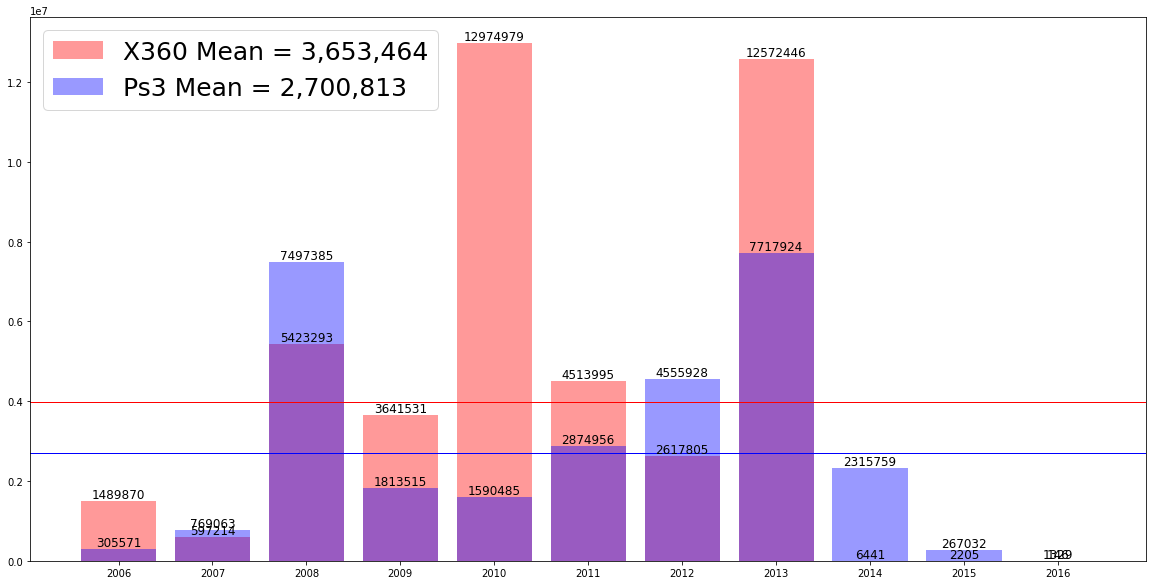

In [10]:
aa = df [ (df.Platform == 'X360') & (df.Year != 2005) ]; bb = df [ df.Platform == 'PS3' ]

aax = aa.groupby(['Year'])['Total_Sales'].sum().reset_index(); bbx = bb.groupby(['Year'])['Total_Sales'].sum().reset_index()
adx = aax.Total_Sales.mean(); bdx = bbx.Total_Sales.mean()

plt.figure( figsize=(20,10) ); plt.xticks(aax.Year);
plt.bar(aax.Year , aax.Total_Sales , label='X360 Mean = 3,653,464', color='red' , alpha=0.4 );
plt.bar(bbx.Year , bbx.Total_Sales , label='Ps3 Mean = 2,700,813', color='blue' , alpha=0.4 );
plt.axhline(y=adx, color='r', linewidth=1); plt.axhline(y=bdx, color='blue', linewidth=1)

for i in range(len(bbx)):
    height = aax.Total_Sales[i]
    plt.text(aax.Year[i], height + 100, '%.0f' %height, ha='center', va='bottom', size = 12)

    he = bbx.Total_Sales[i]
    plt.text(bbx.Year[i], he + 100, '%.0f' %he, ha='center', va='bottom', size = 12)
    
plt.legend(fontsize=25);

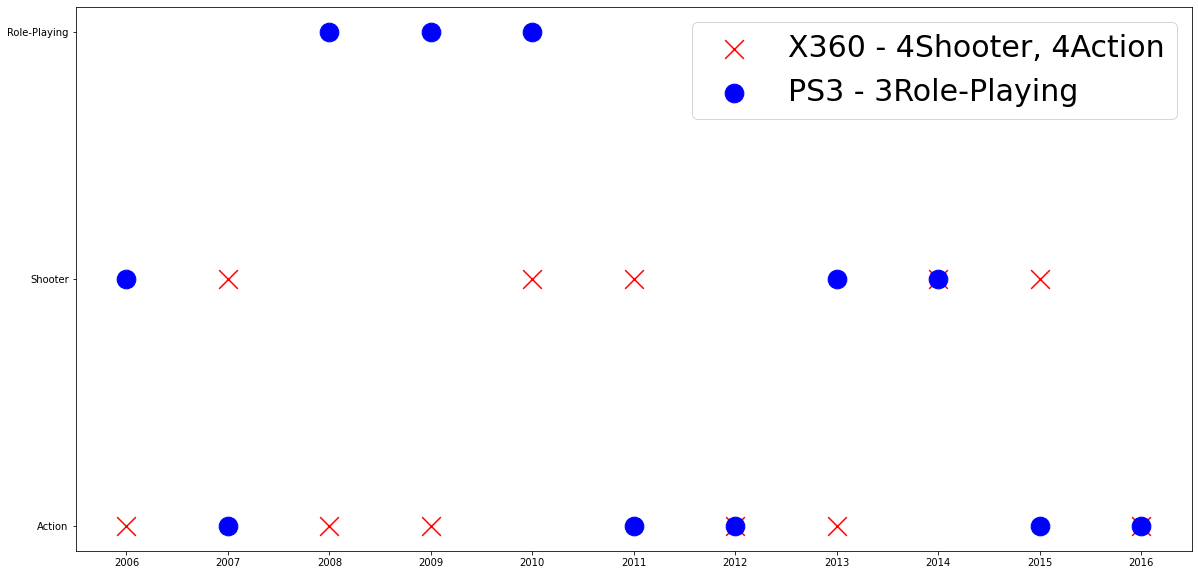

In [11]:
aa = df [ (df.Platform == 'X360') & (df.Year != 2005) & (df.Genre != 'Simulation') ];
bb = df [ (df.Platform == 'PS3') & (df.Genre != 'Sports') & (df.Genre != 'Fighting') & (df.Genre != 'Simulation') ]

aax = aa.groupby(['Year'])['Total_Sales'].transform(max) == aa['Total_Sales']; bbx = bb.groupby(['Year'])['Total_Sales'].transform(max) == bb['Total_Sales']
aab = list(aa[aax].Year); aac = list(aa[aax].Genre); bbb = list(bb[bbx].Year); bbc = list(bb[bbx].Genre)
abx = pd.DataFrame( (zip(aab, aac)) , columns=['year' , 'genre']); bbx = pd.DataFrame( (zip(bbb, bbc)) , columns=['year' , 'genre']);
abx = abx.sort_values('year') ; bbx = bbx.sort_values('year')

plt.figure( figsize=(20,10) ); plt.xticks(abx.year);
plt.scatter(abx.year , abx.genre, color='red' , label='X360 - 4Shooter, 4Action', marker='x' , s=350 );
plt.scatter(bbx.year , bbx.genre, color='blue' , label='PS3 - 3Role-Playing', marker='o' , s=350 );
plt.legend(fontsize = 30);